In [5]:
# two hidden layers with 3 neurons in them each

import numpy as np
inputs = np.array([
    [1,2,3,2.5],
    [2,5,-1,2],
    [-1.5,2.7,3.3,-.8],
    [2.5,8.7,-2.3,1.8],
    ])
weights =np.array([ 
    [0.2,0.8,-.5,1],
    [.5,-.91,.26,-.5],
    [-.26,-.27,.17,.87]
    ])
biases=np.array([2,3,.5])
weights2 = np.array([
    [0.1,-.14,.5],
    [-.5,.12,-.33],
    [-.44,.73,-.13],
])
biases2=np.array([-1,2,-.5])

# we have 4 inputs/features : inputs array has 4 columns
# output is per neuron. each column is one neuron
# n features going to a neuron would require n discrete weight values in that neuron
# n neurons and m features: weight -> (n,m) matrix
# bias: n number of neurons in layer (1,n)


layer1_outputs = np.dot(inputs, np.array(weights).T)+biases
print(f"layer 1 outputs: \n{layer1_outputs}\n") 
layer2_outputs =np.dot(layer1_outputs, np.array(weights2).T)+biases2
print(f"layer 2 outputs: \n{layer2_outputs}")

layer 1 outputs: 
[[ 4.79999995  1.21000004  2.38499999]
 [ 8.9000001  -1.80999994  0.19999999]
 [ 1.41000003  1.051       0.02599999]
 [12.40999985 -5.16499996 -1.324     ]]

layer 2 outputs: 
[[ 0.50310004 -1.04184985 -2.03874993]
 [ 0.24339998 -2.73320007 -5.76329994]
 [-0.99314     1.41254002 -0.35655001]
 [ 0.30209994 -4.38787985 -9.55873013]]


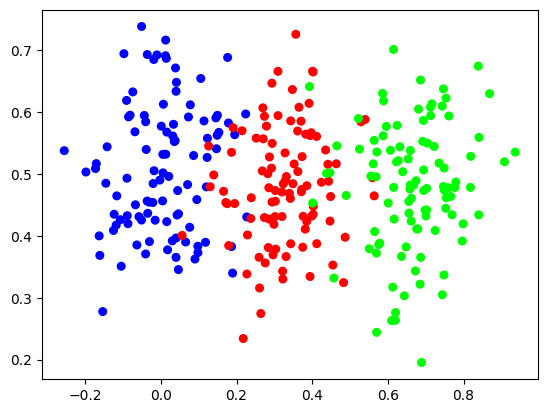

New set of weights found
iteration: 9397, loss: 0.17279711365699768, accuracy:0.93

best_dense1_weights:
[[-3.7844946   4.1894994   2.558105  ]
 [ 1.2427715  -0.93214285  2.2559843 ]]

best_dense1_biases:
[[ 2.718528    0.7409632  -0.29923174]]

best_dense2_weights:
[[ 3.1935701  0.4101369 -3.6568565]
 [-3.503295   1.3317454  2.4984796]
 [-1.1964492 -0.5150452  2.50203  ]]

best_dense2_biases:
[[-0.55808705  1.2470309  -1.6826464 ]]


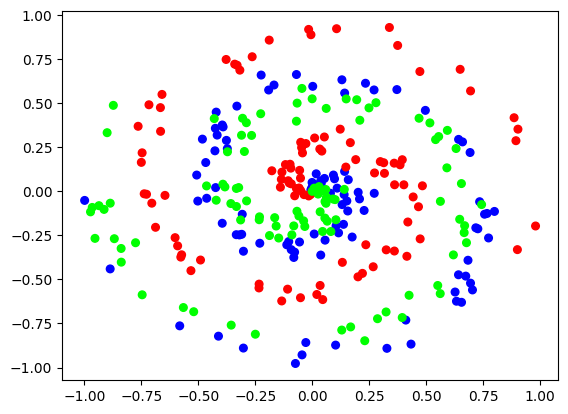

New set of weights found
iteration: 9895, loss: 1.038930892944336, accuracy:0.4633333333333333

best_dense1_weights:
[[-0.7973168  -0.03639689 -0.23601884]
 [-1.1066744  -1.427144    3.033718  ]]

best_dense1_biases:
[[ 0.11371039  0.16607724 -1.7595792 ]]

best_dense2_weights:
[[-1.2765533  -0.10682222  0.41022763]
 [ 1.0855322  -0.7162202  -0.3624888 ]
 [ 0.11983747  3.5931578  -2.1407158 ]]

best_dense2_biases:
[[0.17988026 0.387033   0.22610848]]


In [6]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data, vertical_data
import matplotlib.pyplot as plt
from libs import Layer_Dense, Accuracy, Activation_ReLU, Activation_Softmax, Loss_CategoricalCrossEntropy
%matplotlib inline
nnfs.init()


def find_best_loss(X,y):
    plt.scatter(X[:,0], X[:,1], c=y,s=30, cmap='brg')
    plt.show()
    plt.close()

    dense1 = Layer_Dense(2,3)
    activation1 = Activation_ReLU()
    dense2 = Layer_Dense(3,3)
    activation2 = Activation_Softmax()
    loss_function = Loss_CategoricalCrossEntropy()
    accuracy_function = Accuracy()

    lowest_loss = 9999
    best_dense1_weights = dense1.weights.copy()
    best_dense1_biases = dense1.biases.copy()
    best_dense2_weights = dense2.weights.copy()
    best_dense2_biases = dense2.biases.copy()

    best_loss = 0
    best_accuracy = 0
    best_iteration=0
    for i in range(10000):
        dense1.weights += 0.05 *np.random.randn(2,3)
        dense1.biases += 0.05 *np.random.randn(1,3)
        dense2.weights += 0.05 *np.random.randn(3,3)
        dense2.biases += 0.05 *np.random.randn(1,3)

        dense1.forward(X)
        activation1.forward(dense1.output)
        dense2.forward(activation1.output)
        activation2.forward(dense2.output)
        loss = loss_function.calculate(activation2.output,y)
        accuracy = accuracy_function.calculate(activation2.output,y)


        if loss<lowest_loss:
            best_accuracy = accuracy
            best_loss = loss
            best_iteration=i

            best_dense1_weights = dense1.weights.copy()
            best_dense1_biases = dense1.biases.copy()
            best_dense2_weights = dense2.weights.copy()
            best_dense2_biases = dense2.biases.copy()
            lowest_loss = loss
        else:
            dense1.weights=best_dense1_weights.copy()
            dense1.biases=best_dense1_biases.copy()
            dense2.weights=best_dense2_weights.copy()
            dense2.biases=best_dense2_biases.copy()
    print(f"New set of weights found\niteration: {best_iteration}, loss: {best_loss}, accuracy:{best_accuracy}")        
    print(
            f"\nbest_dense1_weights:\n{best_dense1_weights}\n\nbest_dense1_biases:\n{best_dense1_biases}\n\nbest_dense2_weights:\n{best_dense2_weights}\n\nbest_dense2_biases:\n{best_dense2_biases}"
    )


X,y = vertical_data(samples=100, classes=3)
find_best_loss(X,y)


X,y = spiral_data(samples=100, classes=3)
find_best_loss(X,y)
